In [30]:
import sys
sys.path.append('../') 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from typing import Callable

# Now you can import Strat1
from quantutils.backtester_utils import calc_stats, main_backtester
from itertools import product, combinations, permutations
from Alphas.alphaminer import AlphaMiner, generate_param_combinations_and_multi_index
from Alphas.fxtrendts import FXTrendTS

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def clean_cols(df):
    dfc = df.copy()
    dfc.columns = [col[:3] for col in dfc.columns]
    return dfc

In [3]:
df_fx_spot = clean_cols(pd.read_excel('../Data/FXSpot.xlsx', index_col=0, parse_dates=True))
df_fx_tr = clean_cols(pd.read_excel('../Data/FXTR.xlsx', index_col=0, parse_dates=True))

In [6]:
from Alphas.fxtrend import FXTrend

In [25]:
df_dict = {}
df_dict['price'] = deepcopy(df_fx_spot)
df_dict['ret'] = deepcopy(df_fx_tr.pct_change(fill_method='pad'))
start = '2000-01-01'
end = '2023-01-01'

fxtrend = FXTrend(df_dict, start, end, 100000, None)
groupings = {'EM': ['CZK', 'PLN'], 'DM': ['GBP', 'EUR']}
fxtrend.run_backtest()
fxtrend.pnl_decomposition(cost_list=[0, 0.0001, 0.0002, 0.0005], groupings=groupings)

C:\Users\Wazir\AppData\Local\Temp\ipykernel_25008\3640996772.py:3: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  df_dict['ret'] = deepcopy(df_fx_tr.pct_change(fill_method='pad'))
c:\Users\Wazir\Documents\wazewww\Macro\Backtester\..\quantutils\backtester_utils.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df_ret = df_price.pct_change()
c:\Users\Wazir\Documents\wazewww\Macro\Backtester\..\quantutils\backtester_utils.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df_ret = df_price.pct_change()


In [35]:


pre_compute_params = {}
pre_compute_params['window_pair'] = (16, 64)
fxtrendts = FXTrendTS(df_dict, start, end, 1_000_000, None, pre_compute_params=pre_compute_params)
fxtrendts.run_backtest()


c:\Users\Wazir\Documents\wazewww\Macro\Backtester\..\quantutils\backtester_utils.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df_ret = df_price.pct_change()
c:\Users\Wazir\Documents\wazewww\Macro\Backtester\..\quantutils\backtester_utils.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df_ret = df_price.pct_change()


In [38]:
pre_compute_params_mega = {'window_pair': [(2, 8), (4, 16), (16, 64)]}
post_compute_params_mega = {}
fxtrendts = FXTrendTS(df_dict, start, end, 1_000_000, None, )
alphaminer = AlphaMiner(fxtrendts, pre_compute_params_mega, post_compute_params_mega)
(alphaminer.parameters_mining())


Number Of Combinations: 3
({'window_pair': (2, 8)}, {})


c:\Users\Wazir\Documents\wazewww\Macro\Backtester\..\quantutils\backtester_utils.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df_ret = df_price.pct_change()
c:\Users\Wazir\Documents\wazewww\Macro\Backtester\..\quantutils\backtester_utils.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df_ret = df_price.pct_change()
c:\Users\Wazir\Documents\wazewww\Macro\Backtester\..\quantutils\backtester_utils.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df_ret = df_price.pct_chan

({'window_pair': (4, 16)}, {})
({'window_pair': (16, 64)}, {})
Time taken: 0.5830001831054688 seconds


c:\Users\Wazir\Documents\wazewww\Macro\Backtester\..\quantutils\backtester_utils.py:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df_ret = df_price.pct_change()


c:\Users\Wazir\anaconda3\envs\canonicalport\lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\Wazir\anaconda3\envs\canonicalport\lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\Wazir\anaconda3\envs\canonicalport\lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\Wazir\anaconda3\envs\canonicalport\lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex w

<Axes: xlabel='date'>

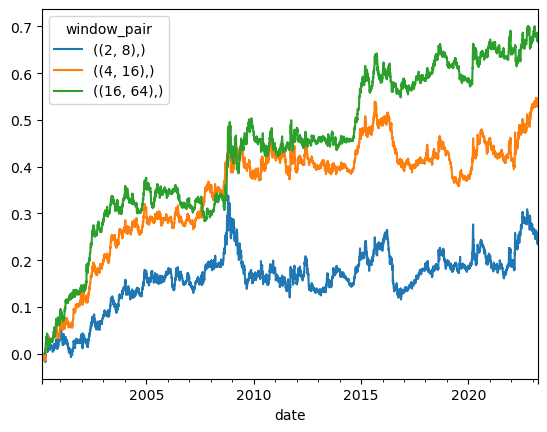

In [39]:
alphaminer.df_pnl_mega.cumsum().plot()